In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

import statsmodels.api as sm

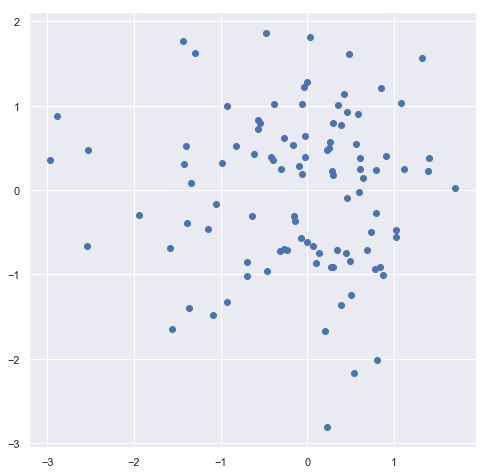

In [13]:
#ホワイトノイズ2つ
mean = 0
sigma = 1 
T = 100

e1 = np.random.normal(mean, sigma, size=T)
e2 = np.random.normal(mean, sigma, size=T)

x = e1
y = e2

plt.figure(figsize=(8,8))
plt.scatter(x,y)

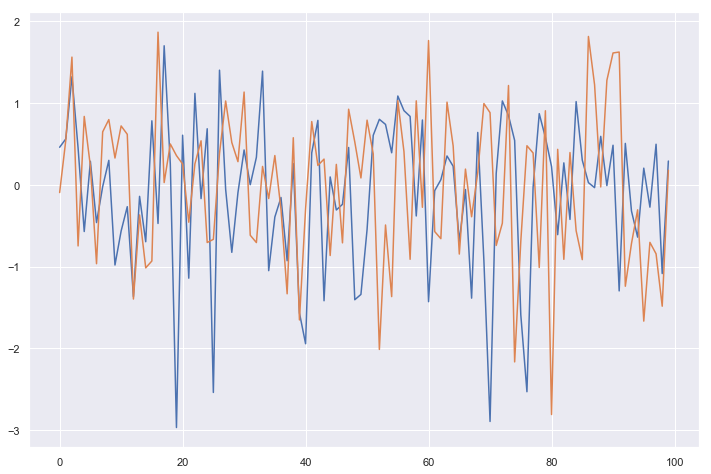

In [14]:
plt.figure(figsize=(12,8))
plt.plot(x)
plt.plot(y)

In [15]:
X = sm.add_constant(x)

model = sm.OLS(y, X)

results = model.fit()

results.summary()
#回帰係数は0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07195
Date:                Sun, 23 Jun 2019   Prob (F-statistic):              0.789
Time:                        12:00:39   Log-Likelihood:                -134.54
No. Observations:                 100   AIC:                             273.1
Df Residuals:                      98   BIC:                             278.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.095     -0.085      0.933      -0.196       0.180
x1            -0.0270      0.101     -0.268      0.789      -0.227       0.173
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.572
Skew:                          -0.300   Prob(JB):                        0.456
Kurtosis:                       2.864   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

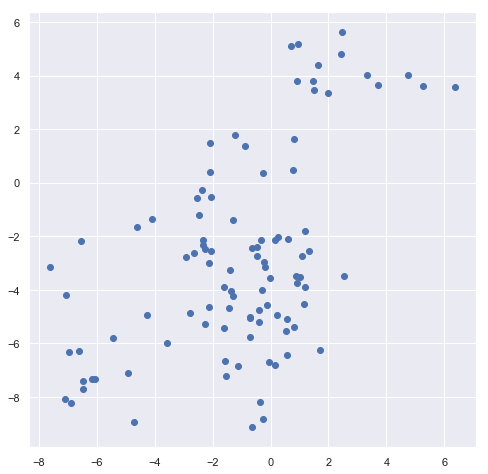

In [18]:
#ランダムウォーク2つ
mean = 0
sigma = 1 
T = 100

e1 = np.random.normal(mean, sigma, size=T)
e2 = np.random.normal(mean, sigma, size=T)

random1 = np.zeros(T)
random1[0] = mean + e1[0]

for t in range(1, T):
    random1[t] = random1[t-1] + e1[t]
    
    
random2 = np.zeros(T)
random2[0] = mean + e2[0]

for t in range(1, T):
    random2[t] = random2[t-1] + e2[t]
    
# 回帰分析に使うデータの指定
x2 = random1
y2 = random2
    
plt.figure(figsize=(8,8))
plt.scatter(x2,y2)

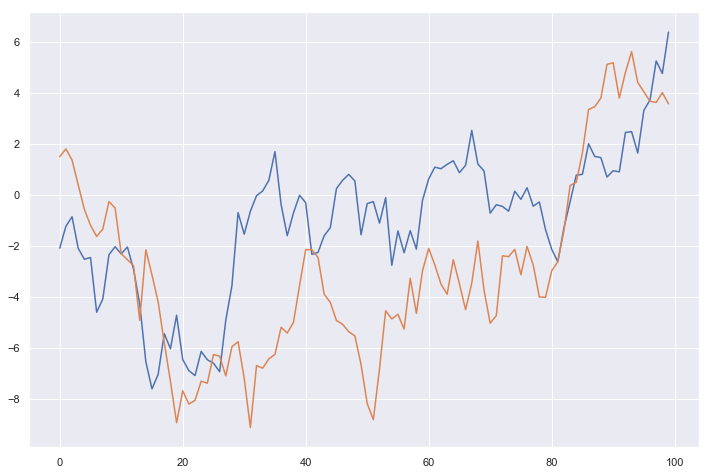

In [19]:
plt.figure(figsize=(12,8))
plt.plot(x2)
plt.plot(y2)

In [20]:
X = sm.add_constant(x2)

model = sm.OLS(y2, X)

results = model.fit()

results.summary()

#回帰係数が有意？

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     40.72
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           5.84e-09
Time:                        12:04:31   Log-Likelihood:                -255.67
No. Observations:                 100   AIC:                             515.3
Df Residuals:                      98   BIC:                             520.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0512      0.338     -6.061      0.000      -2.723      -1.380
x1             0.7114      0.111      6.381      0.000       0.490       0.933
==============================================================================
Omnibus:                        4.060   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                2.439
Skew:                           0.157   Prob(JB):                        0.295
Kurtosis:                       2.302   Cond. No.                         3.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

なぜ？

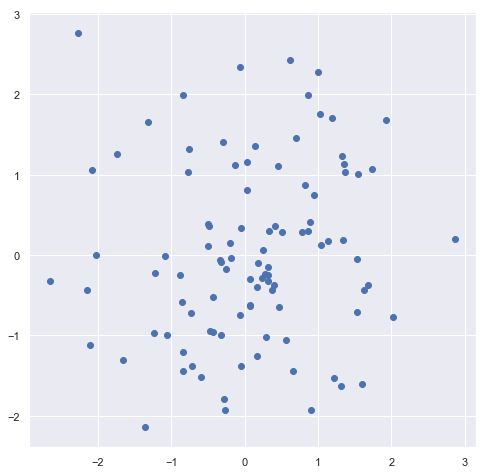

In [21]:
#差分ランダムウォーク2つ
x3 = np.diff(random1)
y3 = np.diff(random2)

plt.figure(figsize=(8,8))
plt.scatter(x3,y3)

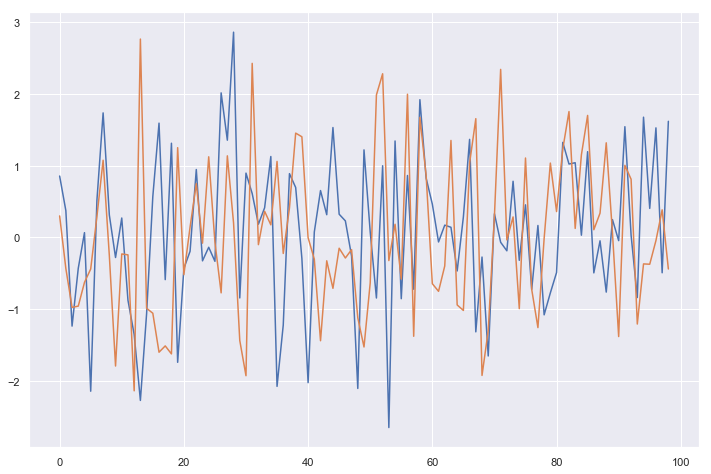

In [22]:
plt.figure(figsize=(12,8))
plt.plot(x3)
plt.plot(y3)

In [23]:
X = sm.add_constant(x3)

model = sm.OLS(y3, X)

results = model.fit()

results.summary()
#回帰係数が有意でない，単位根過程

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.185
Date:                Sun, 23 Jun 2019   Prob (F-statistic):              0.279
Time:                        12:11:30   Log-Likelihood:                -149.28
No. Observations:                  99   AIC:                             302.6
Df Residuals:                      97   BIC:                             307.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.111      0.100      0.921      -0.210       0.232
x1             0.1141      0.105      1.089      0.279      -0.094       0.322
==============================================================================
Omnibus:                        2.596   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.603
Skew:                           0.360   Prob(JB):                        0.272
Kurtosis:                       2.666   Cond. No.                         1.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""